<a href="https://colab.research.google.com/github/fazmila/Project/blob/main/Pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
# Analysis Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
import datetime
from datetime import date,timedelta
import warnings
warnings.filterwarnings('ignore')

# Preprocessing and Modeling Packages
from sklearn.impute import SimpleImputer
from yellowbrick.model_selection import FeatureImportances
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, LabelEncoder
from imblearn.under_sampling import RandomUnderSampler , TomekLinks, NearMiss
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation Metrices
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

In [ ]:
#helper function
# calculate age of customer from birth day
def cal_app_age(day_num):
    birth_day = np.abs(day_num) / 365.25
    return int(birth_day)

# calculate employee len of cutomer
def cal_employed_len(day_num):
    if day_num >= 0:
        return 0
    else:
        employed_len = np.abs(day_num) / 365.25
        return round(employed_len,2)

# Edit NAME_EDUCATION_TYPE
def education_type(edu_type):
    if edu_type == 'Secondary / secondary special':
        edu_type = edu_type.split(' /')[0]
    return edu_type

# Edit NAME_FAMILY_STATUS
def family_status(fam_status):
    if fam_status == 'Single / not married':
        fam_status = fam_status.split(' /')[0]
    return fam_status

# Edit NAME_HOUSING_TYPE
def house_type(house_type):
    if house_type == 'House / apartment':
        house_type = house_type.split(' /')[1].strip()
    return house_type

# function to convert Discrete Numerical Columns to categories
def convert_dtype(list):
    for col in list:
        application_record[col] = application_record[col].astype(str)

# function to convert from float dtype to int dtype
def convert_float_int(cnt_family):
    return int(cnt_family)

In [ ]:
#Reading dataset
application_record = pd.read_csv('/content/drive/MyDrive/application_record.csv')
application_record

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [ ]:
credit_record = pd.read_csv('/content/drive/MyDrive/credit_record.csv')
credit_record

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [ ]:
# head: to show first five rows in our data
application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [ ]:
credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [ ]:
# Shape: to know number of rows and columns for every dataset
(application_record.shape, credit_record.shape)

((438557, 18), (1048575, 3))

In [ ]:
credit_record['STATUS'].unique()

array(['X', '0', 'C', '1', '2', '3', '4', '5'], dtype=object)

In [ ]:
# we want to get the age of account for every Unique ID
begin_month = pd.DataFrame(credit_record.groupby(['ID'])['MONTHS_BALANCE'].agg(min))
begin_month = begin_month.rename(columns={'MONTHS_BALANCE':'Account_Age'})
begin_month

,Account_Age
ID,
5001711,-3
5001712,-18
5001713,-21
5001714,-14
5001715,-59
...,...
5150482,-28
5150483,-17
5150484,-12


In [ ]:
# We do left join of app_record with Account_Age
application_record = pd.merge(application_record, begin_month, how = 'left', on = 'ID')
application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Account_Age
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-15.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-14.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-29.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-4.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-26.0


In [ ]:
# now we want to determine whose bad or good applicants

# define null column called Applicant_Category
credit_record['CUSTOMER_CAtEGORY'] = None

# determine bad or risky applicants
credit_record['CUSTOMER_CAtEGORY'][credit_record['STATUS'] == '2'] = 'Yes'
credit_record['CUSTOMER_CAtEGORY'][credit_record['STATUS'] == '3'] = 'Yes'
credit_record['CUSTOMER_CAtEGORY'][credit_record['STATUS'] == '4'] = 'Yes'
credit_record['CUSTOMER_CAtEGORY'][credit_record['STATUS'] == '5'] = 'Yes'

# display applicant_cateogry column
credit_record['CUSTOMER_CAtEGORY'].unique()

array([None, 'Yes'], dtype=object)

In [ ]:
# New data frame to contain our target column
target = credit_record.groupby('ID').count()
target

,MONTHS_BALANCE,STATUS,CUSTOMER_CAtEGORY
ID,,,
5001711,4,4,0
5001712,19,19,0
5001713,22,22,0
5001714,15,15,0
5001715,60,60,0
...,...,...,...
5150482,18,18,0
5150483,18,18,0
5150484,13,13,0


In [ ]:
target['CUSTOMER_CAtEGORY'][target['CUSTOMER_CAtEGORY'] > 0] = 'bad'
target['CUSTOMER_CAtEGORY'][target['CUSTOMER_CAtEGORY'] == 0] = 'good'

In [ ]:
target

,MONTHS_BALANCE,STATUS,CUSTOMER_CAtEGORY
ID,,,
5001711,4,4,good
5001712,19,19,good
5001713,22,22,good
5001714,15,15,good
5001715,60,60,good
...,...,...,...
5150482,18,18,good
5150483,18,18,good
5150484,13,13,good


In [ ]:
# we want Applicant_Category 'Target' to merge it with other dataframe
target = target[['CUSTOMER_CAtEGORY']]
target

,CUSTOMER_CAtEGORY
ID,
5001711,good
5001712,good
5001713,good
5001714,good
5001715,good
...,...
5150482,good
5150483,good
5150484,good


In [ ]:
# merge two dataframes
application_record = pd.merge(application_record, target, how = 'inner', on = 'ID')
application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Account_Age,CUSTOMER_CAtEGORY
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-15.0,good
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-14.0,good
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-29.0,good
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-4.0,good
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-26.0,good


In [ ]:
application_record.shape

(36457, 20)

In [ ]:
# employed day for applicant
application_record['DAYS_EMPLOYED'] = application_record['DAYS_EMPLOYED'].apply(cal_employed_len)

# add age column will help us which age do more risks
application_record['DAYS_BIRTH'] = application_record['DAYS_BIRTH'].apply(cal_app_age)

# Edit NAME_EDUCATION_TYPE
application_record['NAME_EDUCATION_TYPE'] = application_record['NAME_EDUCATION_TYPE'].apply(education_type)

# Edit NAME_FAMILY_STATUS
application_record['NAME_FAMILY_STATUS'] = application_record['NAME_FAMILY_STATUS'].apply(family_status)

# Edit NAME_HOUSING_TYPE
application_record['NAME_HOUSING_TYPE'] = application_record['NAME_HOUSING_TYPE'].apply(house_type)

# Edit CNT_FAM_MEMBERS
application_record['CNT_FAM_MEMBERS'] = application_record['CNT_FAM_MEMBERS'].apply(convert_float_int)

# rename some columns
application_record = application_record.rename(columns = {'DAYS_BIRTH':'CUSTOMER_AGE','DAYS_EMPLOYED':'EMPLOYED_LENGTH'})

In [ ]:
application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,CUSTOMER_AGE,EMPLOYED_LENGTH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Account_Age,CUSTOMER_CAtEGORY
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12.44,1,1,0,0,NaN,2,-15.0,good
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32,12.44,1,1,0,0,NaN,2,-14.0,good
2,5008806,M,Y,Y,0,112500.0,Working,Secondary,Married,apartment,58,3.10,1,0,0,0,Security staff,2,-29.0,good
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary,Single,apartment,52,8.35,1,0,1,1,Sales staff,1,-4.0,good
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary,Single,apartment,52,8.35,1,0,1,1,Sales staff,1,-26.0,good


In [ ]:
application_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  CUSTOMER_AGE         36457 non-null  int64  
 11  EMPLOYED_LENGTH      36457 non-null  float64
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

In [ ]:
unique_count = pd.DataFrame([(col,application_record[col].nunique())for col in application_record.columns], columns = ['Column_Name','Number_unique']).sort_values(by=['Number_unique'])
unique_count

,Column_Name,Number_unique
12,FLAG_MOBIL,1
19,CUSTOMER_CAtEGORY,2
1,CODE_GENDER,2
2,FLAG_OWN_CAR,2
3,FLAG_OWN_REALTY,2
15,FLAG_EMAIL,2
14,FLAG_PHONE,2
13,FLAG_WORK_PHONE,2
6,NAME_INCOME_TYPE,5
7,NAME_EDUCATION_TYPE,5


In [ ]:
# convert some numerical columns to categorical column like ['FLAG_MOBIL','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL']
list = ['FLAG_MOBIL','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL']
convert_dtype(list)

In [ ]:
application_record.dtypes

,0
ID,int64
CODE_GENDER,object
FLAG_OWN_CAR,object
FLAG_OWN_REALTY,object
CNT_CHILDREN,int64
AMT_INCOME_TOTAL,float64
NAME_INCOME_TYPE,object
NAME_EDUCATION_TYPE,object
NAME_FAMILY_STATUS,object
NAME_HOUSING_TYPE,object


In [ ]:
# select categorical columns to get describe for them
application_record.select_dtypes(exclude = np.number).columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CUSTOMER_CAtEGORY'],
      dtype='object')

In [ ]:
application_record.describe(include = 'O')

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CUSTOMER_CAtEGORY
count,36457,36457,36457,36457,36457,36457,36457,36457,36457,36457,36457,25134,36457
unique,2,2,2,5,5,5,6,1,2,2,2,18,2
top,F,N,Y,Working,Secondary,Married,apartment,1,0,0,0,Laborers,good
freq,24430,22614,24506,18819,24777,25048,32548,36457,28235,25709,33186,6211,35841


In [ ]:
# show unique values of columns has object dtype
for col in application_record.columns:
    if application_record[col].dtype == object:
        print(str(col) + ' : ' + str(application_record[col].unique()))
        print(application_record[col].value_counts())
        print('-'*60)

CODE_GENDER : ['M' 'F']
CODE_GENDER
F    24430
M    12027
Name: count, dtype: int64
------------------------------------------------------------
FLAG_OWN_CAR : ['Y' 'N']
FLAG_OWN_CAR
N    22614
Y    13843
Name: count, dtype: int64
------------------------------------------------------------
FLAG_OWN_REALTY : ['Y' 'N']
FLAG_OWN_REALTY
Y    24506
N    11951
Name: count, dtype: int64
------------------------------------------------------------
NAME_INCOME_TYPE : ['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']
NAME_INCOME_TYPE
Working                 18819
Commercial associate     8490
Pensioner                6152
State servant            2985
Student                    11
Name: count, dtype: int64
------------------------------------------------------------
NAME_EDUCATION_TYPE : ['Higher education' 'Secondary' 'Incomplete higher' 'Lower secondary'
 'Academic degree']
NAME_EDUCATION_TYPE
Secondary            24777
Higher education      9864
Incomplete higher     1

In [ ]:
# select numerical columns to get describe for them
application_record.select_dtypes(include = np.number).columns

Index(['ID', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'CUSTOMER_AGE',
       'EMPLOYED_LENGTH', 'CNT_FAM_MEMBERS', 'Account_Age'],
      dtype='object')

In [ ]:
application_record.describe().T.style.background_gradient(cmap = 'Blues')

,count,mean,std,min,25%,50%,75%,max
ID,36457.000000,5078226.996544,41875.240788,5008804.000000,5042028.000000,5074614.000000,5115396.000000,5150487.000000
CNT_CHILDREN,36457.000000,0.430315,0.742367,0.000000,0.000000,0.000000,1.000000,19.000000
AMT_INCOME_TOTAL,36457.000000,186685.736662,101789.226482,27000.000000,121500.000000,157500.000000,225000.000000,1575000.000000
CUSTOMER_AGE,36457.000000,43.232027,11.503981,20.000000,34.000000,42.000000,53.000000,68.000000
EMPLOYED_LENGTH,36457.000000,6.024156,6.479909,0.000000,1.120000,4.250000,8.630000,43.020000
CNT_FAM_MEMBERS,36457.000000,2.198453,0.911686,1.000000,2.000000,2.000000,3.000000,20.000000
Account_Age,36457.000000,-26.164193,16.501854,-60.000000,-39.000000,-24.000000,-12.000000,0.000000


In [ ]:
# show unique values of columns has int or float dtype
for col in application_record.columns:
    if application_record[col].dtype == np.float64 or application_record[col].dtype == np.int64:
        print(str(col) + ' : '+ str(application_record[col].unique()))
        print(application_record[col].value_counts())
        print('-' * 60)

ID : [5008804 5008805 5008806 ... 5149838 5150049 5150337]
ID
5008804    1
5096993    1
5096983    1
5096987    1
5096988    1
          ..
5050819    1
5050815    1
5050813    1
5050812    1
5150337    1
Name: count, Length: 36457, dtype: int64
------------------------------------------------------------
CNT_CHILDREN : [ 0  1  3  2  4  5 14 19  7]
CNT_CHILDREN
0     25201
1      7492
2      3256
3       419
4        63
5        20
14        3
7         2
19        1
Name: count, dtype: int64
------------------------------------------------------------
AMT_INCOME_TOTAL : [ 427500.   112500.   270000.   283500.   135000.   130500.   157500.
  405000.   211500.   360000.   126000.   315000.   247500.   297000.
  225000.   166500.   216000.   255150.   148500.   202500.    94500.
  450000.   180000.    90000.   765000.   382500.   144000.   229500.
  292500.    74250.    40500.   337500.   193500.   267750.   139500.
   67500.   252000.   900000.   115290.   279000.    76500.   234000.
  

In [ ]:
# check duplicates rows
application_record.duplicated().sum()

0

In [ ]:
# check percentage of null values in each column
grouped_data = []
for col in application_record.columns:
    num_missing = application_record[col].isnull().sum()
    percentage = round((num_missing / application_record.shape[0])*100,2)
    grouped_data.append([col, num_missing, percentage])

# display them in dataframe
grouped_df = pd.DataFrame(grouped_data,columns= ['Column', 'num_missing', 'percentage'])
grouped_df

,Column,num_missing,percentage
0,ID,0,0.00
1,CODE_GENDER,0,0.00
2,FLAG_OWN_CAR,0,0.00
3,FLAG_OWN_REALTY,0,0.00
4,CNT_CHILDREN,0,0.00
5,AMT_INCOME_TOTAL,0,0.00
6,NAME_INCOME_TYPE,0,0.00
7,NAME_EDUCATION_TYPE,0,0.00
8,NAME_FAMILY_STATUS,0,0.00
9,NAME_HOUSING_TYPE,0,0.00


EDA

In [ ]:
# color palettes
pie_palette = ['#3E885B','#7694B6','#85BDA6', '#80AEBD', '#2F4B26', '#3A506B']
green_palette = ['#2F4B26', '#3E885B', '#85BDA6', '#BEDCFE', '#C0D7BB']
blue_palette = ['#3A506B', '#7694B6', '#80AEBD', '#5BC0BE', '#3E92CC']
custom_palette = ['#3A506B', '#7694B6', '#80AEBD', '#3E885B', '#85BDA6']
red_palette = ['#410B13', '#CD5D67', '#BA1F33', '#421820', '#91171F']

In [ ]:
#1) Which Gender Treat more with Bank?
application_record['CODE_GENDER'].value_counts()

,count
CODE_GENDER,
F,24430
M,12027


In [ ]:
total_records = len(application_record)
gender_counts = application_record["CODE_GENDER"].value_counts()
gender_percent = (gender_counts["F"] / total_records) * 100

fig = px.pie(values=[gender_percent, 100 - gender_percent], names=["Female", "Male"],
             title="<b>"+'Gender percentage',
             color_discrete_sequence=[ "#1f77b4" ,"#d62728" ])

fig.update_traces(textinfo="percent+label", pull=[0.2, 0], textposition="inside")
fig.update_layout(legend_title="Gender", height=600, title_x=0.5, title_font_color="black",title_font_size=27)

# Show the plot
fig.show()

In [ ]:
#2) Which Gender has higher Delinquency rate?
# Group by 'CUSTOMER_CAtEGORY' and count 'CODE_GENDER'
gender_cat = pd.DataFrame(application_record.groupby('CUSTOMER_CAtEGORY')['CODE_GENDER'].value_counts())
gender_cat = gender_cat.rename(columns={'CODE_GENDER': 'Count'})
gender_cat = gender_cat.reset_index()
gender_cat

,CUSTOMER_CAtEGORY,CODE_GENDER,count
0,bad,F,379
1,bad,M,237
2,good,F,24051
3,good,M,11790


In [ ]:
fig = px.histogram(gender_cat, x='CODE_GENDER', y = 'count',color='CUSTOMER_CAtEGORY', barmode='group',color_discrete_sequence=['#d62728','#80AEBD'],title="<b>"+'Gender VS Customer Category',text_auto= True)
fig.show()

In [ ]:
#3) Which MartialStatus has the highest Delinquency rate?
# Group by 'CUSTOMER_CAtEGORY' and count 'NAME_FAMILY_STATUS'
martial_status_cat = pd.DataFrame(application_record.groupby('CUSTOMER_CAtEGORY')['NAME_FAMILY_STATUS'].value_counts())
martial_status_cat = martial_status_cat.rename(columns={'NAME_FAMILY_STATUS': 'Count'})
martial_status_cat = martial_status_cat.reset_index()
martial_status_cat

,CUSTOMER_CAtEGORY,NAME_FAMILY_STATUS,count
0,bad,Married,393
1,bad,Single,101
2,bad,Civil marriage,46
3,bad,Widow,45
4,bad,Separated,31
5,good,Married,24655
6,good,Single,4728
7,good,Civil marriage,2899
8,good,Separated,2072
9,good,Widow,1487


In [ ]:
fig = px.bar(martial_status_cat, x='NAME_FAMILY_STATUS', y = 'count',color='CUSTOMER_CAtEGORY', barmode='group',color_discrete_sequence=['rgba(58, 71, 80, 0.6)' ,'rgba(246, 78, 139, 1.0)'],title="<b>"+'Martial Status Vs Customer Category',text_auto= True)

fig.show()

In [ ]:
# Get Females and put them in new dataframe
application_record.groupby(['CODE_GENDER','CNT_CHILDREN'])[['ID']].count()

ID
CODE_GENDER CNT_CHILDREN       
F           0             17519
            1              4709
            2              1884
            3               257
            4                47
            5                11
            7                 2
            19                1
M           0              7682
            1              2783
            2              1372
            3               162
            4                16
            5                 9
            14                3

In [ ]:
# Group by 'CUSTOMER_CAtEGORY' and count 'EMPLOYED_LENGTH'
customer_age_cat = pd.DataFrame(application_record.groupby('CUSTOMER_CAtEGORY')['CUSTOMER_AGE'].value_counts())
customer_age_cat = customer_age_cat.rename(columns={'CUSTOMER_AGE': 'Count'})
customer_age_cat = customer_age_cat.reset_index()
customer_age_cat

,CUSTOMER_CAtEGORY,CUSTOMER_AGE,count
0,bad,33,27
1,bad,51,27
2,bad,30,26
3,bad,29,25
4,bad,28,22
...,...,...,...
90,good,22,151
91,good,67,124
92,good,68,26
93,good,21,10


In [ ]:
fig = px.bar(customer_age_cat[customer_age_cat['CUSTOMER_CAtEGORY'] == 'bad'], x='CUSTOMER_AGE', y = 'count', barmode='group',color_discrete_sequence= ['#FF5733'] ,title="<b>"+"Customer's Age with Bad Type",text_auto= True)

fig.show()

In [ ]:
# lets see average annual income for every eduaction type
avg_annual_income = round(application_record.groupby(['CUSTOMER_CAtEGORY','NAME_EDUCATION_TYPE'])[['AMT_INCOME_TOTAL']].mean(),2)
avg_annual_income = avg_annual_income.reset_index()
avg_annual_income

,CUSTOMER_CAtEGORY,NAME_EDUCATION_TYPE,AMT_INCOME_TOTAL
0,bad,Higher education,228901.00
1,bad,Incomplete higher,165545.45
2,bad,Lower secondary,137610.00
3,bad,Secondary,170426.68
4,good,Academic degree,247500.00
5,good,Higher education,223642.51
6,good,Incomplete higher,202528.76
7,good,Lower secondary,141771.02
8,good,Secondary,171706.08


In [ ]:
fig = px.histogram(avg_annual_income, x="AMT_INCOME_TOTAL", y="NAME_EDUCATION_TYPE", facet_col="CUSTOMER_CAtEGORY" ,orientation="h", color="CUSTOMER_CAtEGORY" ,text_auto= True , title="<b>"+'Education Type Vs Income with in Customer Category' , color_discrete_sequence = ['#BA1F33','#3A506B','#3E885B'])

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=27,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='AMT_INCOME_TOTAL',
yaxis_title='NAME_EDUCATION_TYPE',
)
fig.show()

In [ ]:
fig=px.histogram(application_record,x="OCCUPATION_TYPE",title="<b>Distribution Of Occupation Type ",
                color_discrete_sequence=px.colors.qualitative.Vivid,barmode = 'group', text_auto= True )
fig.update_layout(template="plotly")
fig.update_layout(title_font_size=27,title_x= 0.5, title_font_color = 'black',height = 500)
fig.show()

In [ ]:
# sort dataframe using age, then group by age, and get avg annual income for each age
age_annual_income = application_record.sort_values(by='CUSTOMER_AGE').groupby(['CODE_GENDER','CUSTOMER_AGE'])[['AMT_INCOME_TOTAL']].mean().reset_index()
age_annual_income = age_annual_income.rename(columns = {'AMT_INCOME_TOTAL':'AMT_INCOME_AVG'})
age_annual_income

,CODE_GENDER,CUSTOMER_AGE,AMT_INCOME_AVG
0,F,20,112500.000000
1,F,21,147214.285714
2,F,22,131450.704225
3,F,23,151695.000000
4,F,24,147319.489933
...,...,...,...
92,M,64,239102.608696
93,M,65,109215.000000
94,M,66,163583.333333
95,M,67,151670.454545


In [ ]:
fig_bubble = px.scatter(age_annual_income, x="CUSTOMER_AGE", y="AMT_INCOME_AVG", size="AMT_INCOME_AVG", color="CODE_GENDER", title="<b>"+'Customer Age Vs Average Annual Income within Gender',
                        color_discrete_sequence=["#d62728", "#1f77b4"])

# Customize the plot
fig_bubble.update_layout(hovermode='x',title_font_size=27)
fig_bubble.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='CUSTOMER_AGE',
yaxis_title='AMT_INCOME_AVG',
height = 600
)
fig_bubble.show()

In [ ]:
# Create histograms for Customer Catogery by own car and house type
fig = px.histogram(application_record, x="NAME_HOUSING_TYPE", color="CUSTOMER_CAtEGORY",
                   #
                   facet_col="FLAG_OWN_CAR",
                   title="<b>Customer Category by House Type and Flag Own Car",
                   color_discrete_sequence=px.colors.qualitative.Pastel, text_auto=True)

# Customize the plot
fig.update_layout(xaxis_title="NAME_HOUSING_TYPE", yaxis_title="Count",title_x = 0.5, title_font_color = 'black', title_font_size=27,height = 600)
fig.update_xaxes(matches='x')
fig.show()

Data Preprocessing

In [ ]:
#Handling Missing Values
# percentage of missing in each column
round((application_record.isnull().sum()*100 / application_record.shape[0]),2)

,0
ID,0.00
CODE_GENDER,0.00
FLAG_OWN_CAR,0.00
FLAG_OWN_REALTY,0.00
CNT_CHILDREN,0.00
AMT_INCOME_TOTAL,0.00
NAME_INCOME_TYPE,0.00
NAME_EDUCATION_TYPE,0.00
NAME_FAMILY_STATUS,0.00
NAME_HOUSING_TYPE,0.00


In [ ]:
# cause value of missing morethan 10% we can't fill by one value
fill_miss = application_record[['OCCUPATION_TYPE']].value_counts().reset_index()
fill_miss

,OCCUPATION_TYPE,count
0,Laborers,6211
1,Core staff,3591
2,Sales staff,3485
3,Managers,3012
4,Drivers,2138
5,High skill tech staff,1383
6,Accountants,1241
7,Medicine staff,1207
8,Cooking staff,655
9,Security staff,592


In [ ]:
# we will randomly with will all values in column
fill_list = []
for idx, ele in enumerate(fill_miss['OCCUPATION_TYPE']):
    fill_list.append(ele)

fill_list

['Laborers',
 'Core staff',
 'Sales staff',
 'Managers',
 'Drivers',
 'High skill tech staff',
 'Accountants',
 'Medicine staff',
 'Cooking staff',
 'Security staff',
 'Cleaning staff',
 'Private service staff',
 'Low-skill Laborers',
 'Waiters/barmen staff',
 'Secretaries',
 'HR staff',
 'Realty agents',
 'IT staff']

In [ ]:
application_record['OCCUPATION_TYPE'].fillna(pd.Series(np.random.choice(fill_list, size= application_record.shape[0])),inplace = True)

In [ ]:
# we filled nulls
application_record['OCCUPATION_TYPE'].isnull().sum()

0

In [ ]:
#Encoding
le = LabelEncoder()

In [ ]:
# Encode for cat_cols
for i in application_record.columns:
  if application_record[i].dtype == 'object':
    application_record[i] = le.fit_transform(application_record[i]).astype('int64')


application_record.head(4)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,CUSTOMER_AGE,EMPLOYED_LENGTH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Account_Age,CUSTOMER_CAtEGORY
0,5008804,1,1,1,0,427500.0,4,1,0,3,32,12.44,0,1,0,0,7,2,-15.0,1
1,5008805,1,1,1,0,427500.0,4,1,0,3,32,12.44,0,1,0,0,5,2,-14.0,1
2,5008806,1,1,1,0,112500.0,4,4,1,5,58,3.10,0,0,0,0,16,2,-29.0,1
3,5008808,0,0,1,0,270000.0,0,4,3,5,52,8.35,0,0,1,1,14,1,-4.0,1


In [ ]:
# check correlation between varaibles
corr_matrix = application_record.corr()
corr_matrix

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,CUSTOMER_AGE,EMPLOYED_LENGTH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Account_Age,CUSTOMER_CAtEGORY
ID,1.000000,0.012022,-0.011163,-0.098851,0.028878,-0.017667,0.023193,-0.009211,-0.004336,-0.023312,-0.056346,-0.005741,NaN,0.079215,0.009879,-0.046979,0.006334,0.026624,0.001364,-0.015588
CODE_GENDER,0.012022,1.000000,0.361379,-0.050758,0.077690,0.197805,0.105639,0.005880,-0.099289,-0.035002,-0.202286,-0.031725,NaN,0.064994,-0.026833,-0.003284,-0.025674,0.110782,0.005079,-0.015292
FLAG_OWN_CAR,-0.011163,0.361379,1.000000,-0.015185,0.105839,0.215506,0.054817,-0.101272,-0.121716,-0.003806,-0.156825,0.006256,NaN,0.021644,-0.014019,0.021750,-0.044153,0.151814,-0.029627,0.004341
FLAG_OWN_REALTY,-0.098851,-0.050758,-0.015185,1.000000,-0.000575,0.032719,-0.046543,0.010997,0.022993,0.158517,0.129237,-0.033647,NaN,-0.207732,-0.066601,0.052194,0.015928,-0.005723,0.006476,0.022247
CNT_CHILDREN,0.028878,0.077690,0.105839,-0.000575,1.000000,0.033691,0.109401,-0.049823,-0.160386,-0.015129,-0.339310,0.043352,NaN,0.048091,-0.016291,0.015960,-0.015355,0.889114,-0.003984,0.000308
AMT_INCOME_TOTAL,-0.017667,0.197805,0.215506,0.032719,0.033691,1.000000,-0.072974,-0.226931,-0.001191,-0.009243,-0.067622,0.087139,NaN,-0.037746,0.017245,0.086681,0.002455,0.023750,-0.017494,0.001057
NAME_INCOME_TYPE,0.023193,0.105639,0.054817,-0.046543,0.109401,-0.072974,1.000000,0.057225,-0.048532,-0.022848,-0.213533,0.192958,NaN,0.165785,0.006529,-0.019567,-0.035357,0.109313,-0.000846,0.006049
NAME_EDUCATION_TYPE,-0.009211,0.005880,-0.101272,0.010997,-0.049823,-0.226931,0.057225,1.000000,0.007747,-0.008050,0.169541,-0.016356,NaN,-0.021092,-0.044875,-0.098457,0.068246,-0.041344,0.014839,0.005215
NAME_FAMILY_STATUS,-0.004336,-0.099289,-0.121716,0.022993,-0.160386,-0.001191,-0.048532,0.007747,1.000000,-0.025295,0.106505,-0.049983,NaN,-0.063103,-0.015065,-0.010895,-0.005916,-0.546511,0.030053,-0.021266
NAME_HOUSING_TYPE,-0.023312,-0.035002,-0.003806,0.158517,-0.015129,-0.009243,-0.022848,-0.008050,-0.025295,1.000000,0.077884,-0.003695,NaN,-0.008929,0.018242,0.007580,-0.000198,0.003455,-0.009276,0.012710


<Axes: >

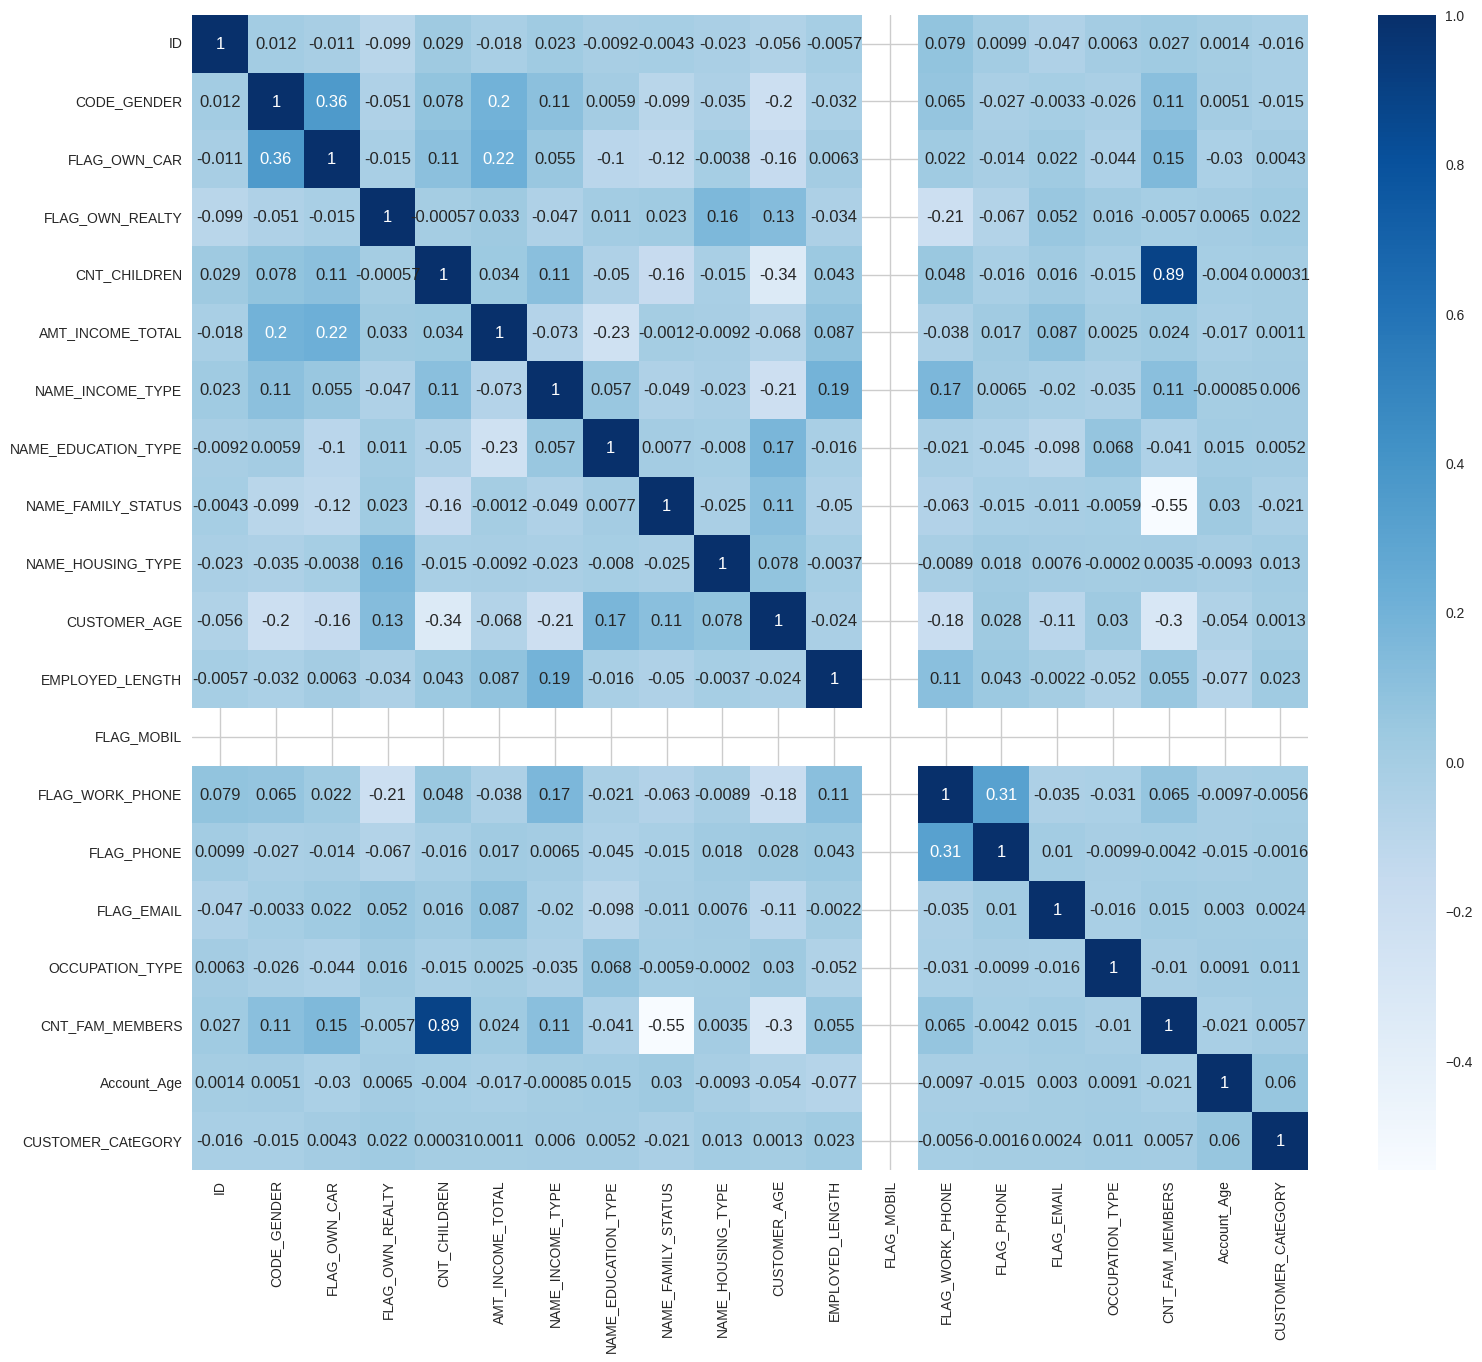

In [ ]:
plt.figure(figsize = (18,15))
sns.heatmap(application_record.corr() , annot = True , cmap = 'Blues')

In [ ]:
# lets drop Some Uncesscary Columns
application_record.drop(['ID', 'FLAG_MOBIL','Account_Age','CNT_CHILDREN'],axis = 1, inplace = True)

In [ ]:
#Handling Outliers
application_record.dtypes

,0
CODE_GENDER,int64
FLAG_OWN_CAR,int64
FLAG_OWN_REALTY,int64
AMT_INCOME_TOTAL,float64
NAME_INCOME_TYPE,int64
NAME_EDUCATION_TYPE,int64
NAME_FAMILY_STATUS,int64
NAME_HOUSING_TYPE,int64
CUSTOMER_AGE,int64
EMPLOYED_LENGTH,float64


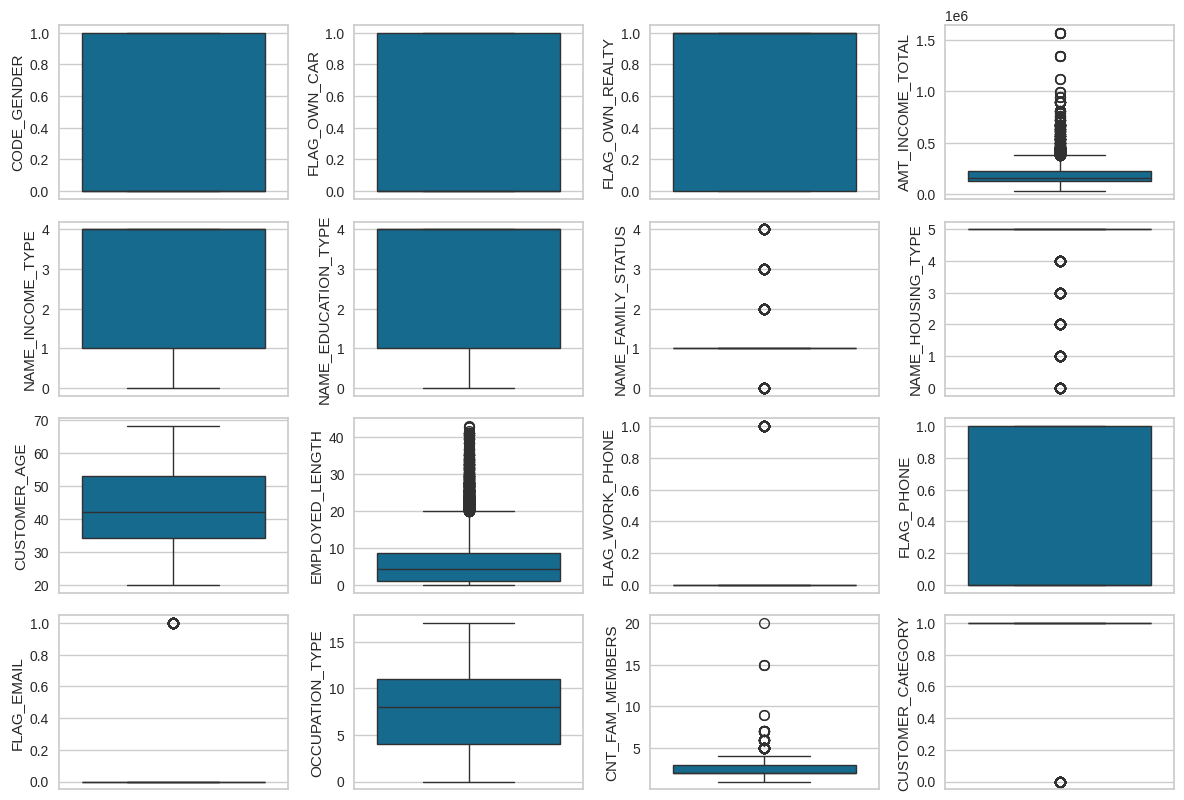

In [ ]:
# check there is outliers in each column or not
fig = plt.figure(figsize=(12,18))
for i in range(len(application_record.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=application_record.iloc[:,i])

plt.tight_layout()
plt.show()

In [ ]:
# Lets Detect True Outliers
def handle_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define Upper and Lower Fence
    Upper = Q3 + 1.5 * IQR
    Lower = Q1 - 1.5 * IQR

    # Remove Outliers from column
    new_df = df[ (df[column_name] > Lower) & (df[column_name] < Upper) ]

    # return new column
    return new_df

In [ ]:
# Call handle_outliers Function to remove outliers in columns
cols_outliers = ['AMT_INCOME_TOTAL', 'EMPLOYED_LENGTH']

# lets give our column to the function
for col in cols_outliers:
    application_record = handle_outliers(application_record, col)

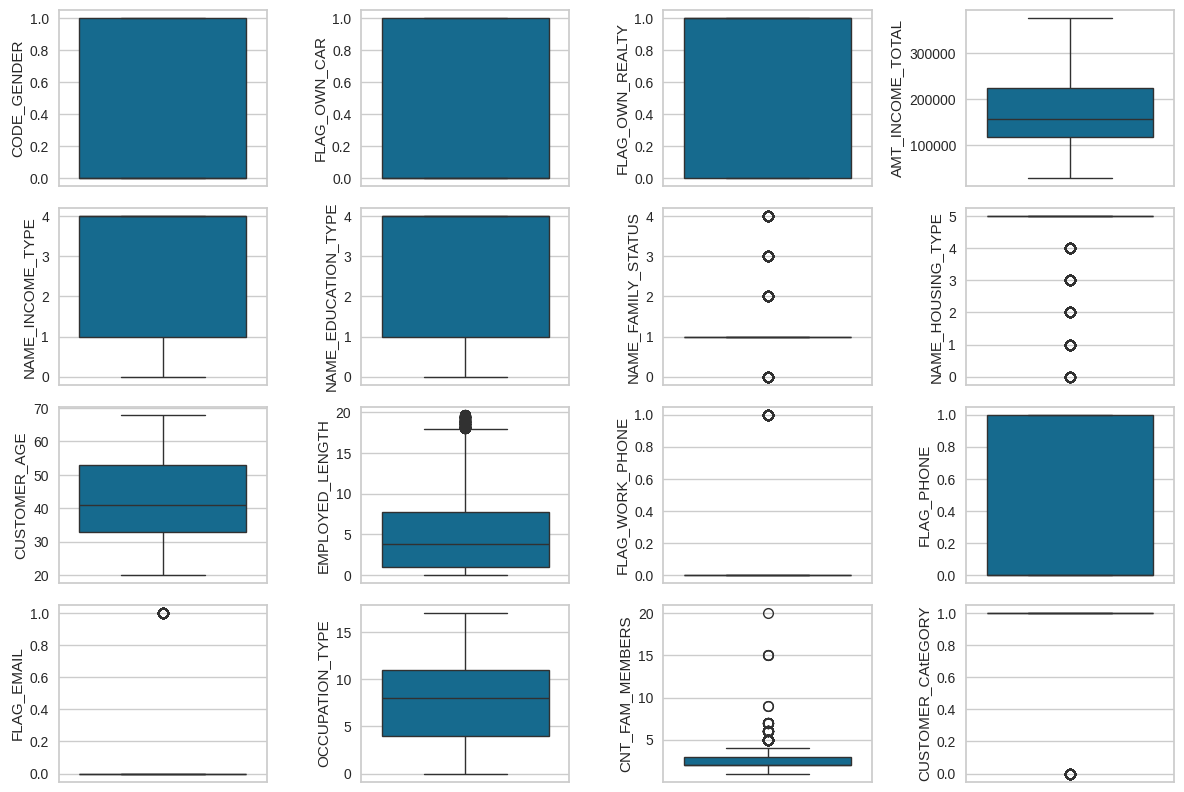

In [ ]:
# check columns after removing outliers
fig = plt.figure(figsize=(12,18))
for i in range(len(application_record.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=application_record.iloc[:,i])

plt.tight_layout()
plt.show()

In [ ]:
#Handling Imbalanced Data
X = application_record.drop('CUSTOMER_CAtEGORY', axis = 1)
Y = application_record['CUSTOMER_CAtEGORY']

In [ ]:
smt = SMOTETomek(random_state=42)
x_over, y_over = smt.fit_resample(X, Y)

In [ ]:
x_over.shape, y_over.shape

((65112, 15), (65112,))

In [ ]:
#Split Data
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size = 0.30, random_state = 42)

In [ ]:
# Now lets Normalize our Data to make features in same range to help models train faster
Mn = MinMaxScaler()
x_train_scaled = Mn.fit_transform(x_train)
x_test_scaled = Mn.fit_transform(x_test)

In [ ]:
#Modeling
# take instances from classifiers Model
log_reg = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()


In [ ]:
# Models
classifiers_models = [log_reg, dt, rf]

# Models Name
classifiers_models_name = ['Logistic Regression', 'Decision Tree', 'Random Forest']

# lets feed train data to each model
for clf in classifiers_models:
    clf.fit(x_train_scaled, y_train)

In [ ]:
train_acc_list = []
test_acc_list = []

# lets make our models predict target
for clf, name in zip(classifiers_models, classifiers_models_name):
    y_pred_train = clf.predict(x_train_scaled)
    y_pred = clf.predict(x_test_scaled)

    # print each model and each score on data
    print(f'Using Model: {name}')
    print(f'Training Score: {clf.score(x_train_scaled,y_train)}')
    print(f'Test Score: {clf.score(x_test_scaled,y_test)}')

    # Lets check train and test accuracy
    print(f'Acc Train: {accuracy_score(y_train, y_pred_train)}')
    print(f'Acc Test: {accuracy_score(y_test, y_pred)}')

    # append them to our train acc and test acc lists
    train_acc_list.append(accuracy_score(y_train, y_pred_train))
    test_acc_list.append(accuracy_score(y_test, y_pred))

    # to make space between results of each model
    print('')
    print('*' * 60)
    print('')

Using Model: Logistic Regression
Training Score: 0.6978805564087938
Test Score: 0.6987816115490939
Acc Train: 0.6978805564087938
Acc Test: 0.6987816115490939

************************************************************

Using Model: Decision Tree
Training Score: 0.9944051954890517
Test Score: 0.9123579400020477
Acc Train: 0.9944051954890517
Acc Test: 0.9123579400020477

************************************************************

Using Model: Random Forest
Training Score: 0.9944051954890517
Test Score: 0.9678509265895362
Acc Train: 0.9944051954890517
Acc Test: 0.9678509265895362

************************************************************



In [ ]:
# make dataframe contains our models accuray in test and train, index will be models name
all_models = pd.DataFrame({'Train_Accuracy':train_acc_list, 'Test_Accuracy':test_acc_list}, index = classifiers_models_name)
all_models

,Train_Accuracy,Test_Accuracy
Logistic Regression,0.697881,0.698782
Decision Tree,0.994405,0.912358
Random Forest,0.994405,0.967851


In [ ]:
# lets visualize our model results

# Models Vs Train Accuracies
fig = px.bar(all_models, x=all_models['Train_Accuracy'], y = all_models.index ,color=all_models['Train_Accuracy'],title="<b>"+'Models Vs Train Accuracies',text_auto= True , color_continuous_scale='Reds')
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=27,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Train Accuracies',
yaxis_title='Models Name',
)
fig.show()

# Models Vs Test Accuracies
fig = px.bar(all_models, x=all_models['Test_Accuracy'], y = all_models.index ,color=all_models['Test_Accuracy'],title="<b>"+'Models Vs Test Accuracies',text_auto= True , color_continuous_scale='Reds')
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=27,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Train Accuracies',
yaxis_title='Models Name',
)
fig.show()

Using Model: Logistic Regression
Accuracy: 0.6987816115490939
ROC Area Under Curve:0.6987292927488612
              precision    recall  f1-score   support

           0       0.72      0.66      0.69      9754
           1       0.68      0.74      0.71      9780

    accuracy                           0.70     19534
   macro avg       0.70      0.70      0.70     19534
weighted avg       0.70      0.70      0.70     19534



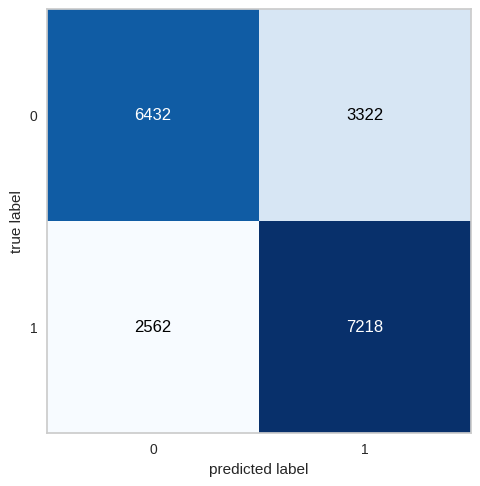

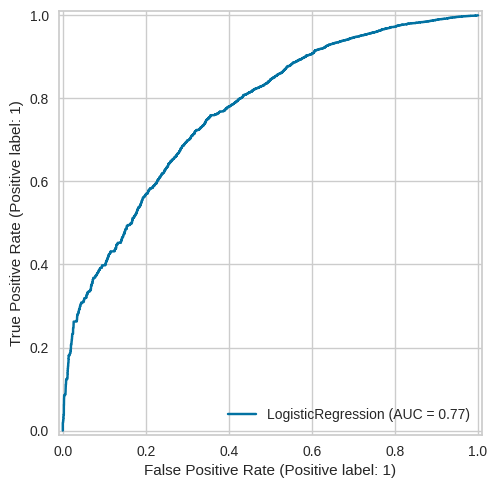

************************************************************
Using Model: Decision Tree
Accuracy: 0.9116412409132794
ROC Area Under Curve:0.9115773068612615
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      9754
           1       0.88      0.96      0.92      9780

    accuracy                           0.91     19534
   macro avg       0.92      0.91      0.91     19534
weighted avg       0.92      0.91      0.91     19534



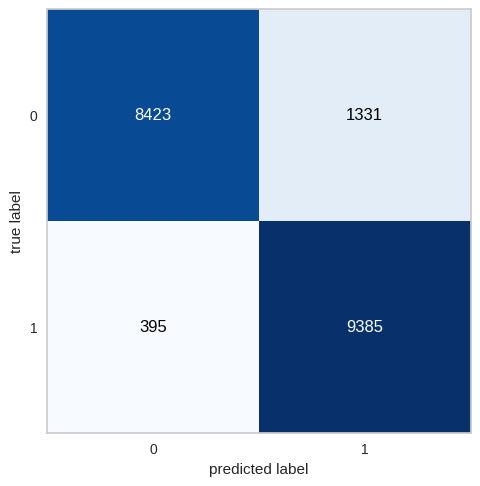

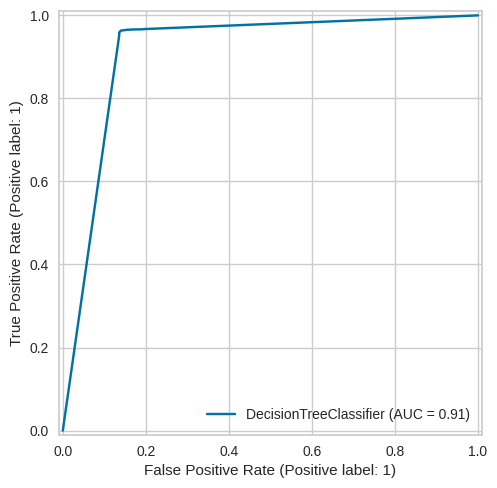

************************************************************
Using Model: Random Forest
Accuracy: 0.9686188184703594
ROC Area Under Curve:0.9685983895024137
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      9754
           1       0.95      0.98      0.97      9780

    accuracy                           0.97     19534
   macro avg       0.97      0.97      0.97     19534
weighted avg       0.97      0.97      0.97     19534



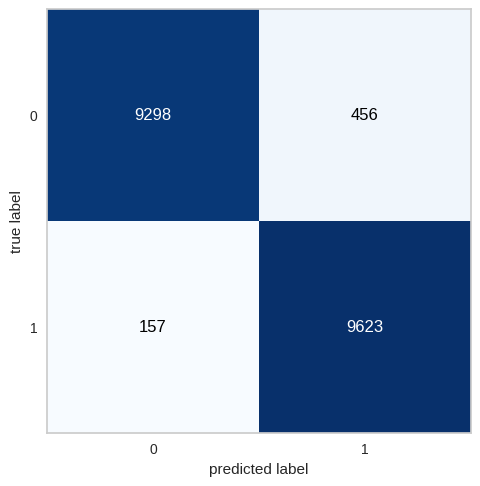

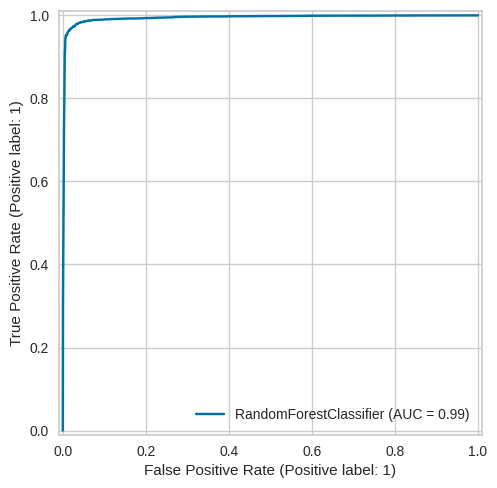

************************************************************


In [ ]:
#Evaluation
# Get Evaluation metrices for our models
for clf, name in zip(classifiers_models, classifiers_models_name):

    # Which Model running now
    model = clf
    print(f'Using Model: {name}')

    # Make model train or fit data, then predict
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)

    # Get accuarcy and area under curve of roc for each model
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f'Accuracy: {accuracy}')
    print(f'ROC Area Under Curve:{roc_auc}')

    # Get classification report
    print(classification_report(y_test, y_pred))

    # Get confusion matrix
    plot_confusion_matrix(confusion_matrix(y_test, y_pred))

    # Display ROC Curve
    RocCurveDisplay.from_estimator(model, x_test_scaled, y_test)
    plt.show()

    print('*'*60)